In [2]:
import matplotlib.pyplot as plt

In [3]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        transforms.ToTensor()
    ]
)

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)

print(transformed_image.shape)

torch.Size([3, 512, 512])


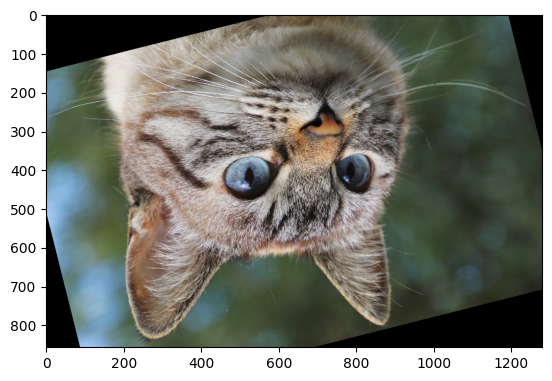

In [7]:
transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5)
    ]
)

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)
plt.imshow(transformed_image)